In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('home.price.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing # I need to scaled my values to be between 0 and 1

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(df.drop('price', axis='columns'))
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
y_scaled.reshape(20,) # Now we need to reshape y_scaled into 1D array

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [7]:
np.random.permutation(20) # random permutation look like this 

array([ 3, 14,  7,  1, 16,  5,  9, 15,  4,  2,  8, 17, 10,  0, 12,  6, 13,
       19, 11, 18])

In [9]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape = (number_of_features))
  bias = 0
  total_samples = X.shape[0]

  if batch_size > total_samples: # It will be doing it every 5 sample 
    batch_size = total_samples
  cost_list = []
  epoch_list = []

  num_batches = int(total_samples / batch_size)

  for i in range(epochs): # Here i run epochs
    random_indices = np.random.permutation(total_samples) # Its gonna pick random samples
    X_tmp = X[random_indices] # From X
    y_tmp = y_true[random_indices] # And from y_true 

    for j in range(0, total_samples, batch_size):
      Xj = X_tmp[j : j + batch_size]
      yj = y_tmp[j : j + batch_size]
      y_pred = np.dot(w, Xj.T) + bias

      w_grad = -(2/len(Xj)) * (Xj.T.dot(yj - y_pred))
      b_grad = -(2/len(Xj)) * np.sum(yj - y_pred)

      w = w - learning_rate * w_grad
      bias = bias - learning_rate * b_grad

      cost = np.mean(np.square(yj - y_pred))
    
    if i%10 == 0: # It will be filling my list every tenth iteration
      cost_list.append(cost)
      epoch_list.append(i)

  return w, bias, cost, cost_list, epoch_list

w, bias, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    X_scaled,
    y_scaled.reshape(y_scaled.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, bias, cost


(array([0.71018653, 0.67820872]), -0.2334852972263946, 0.002961082150871461)

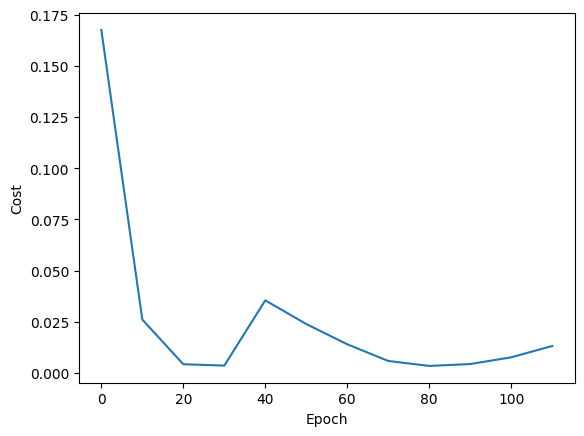

In [13]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list, cost_list)

In [10]:
def predict(area, bedrooms, w, bias):
  scaled_X = sx.transform([[area, bedrooms]])[0]
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + bias 

  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, bias)


c:\Users\pulow\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.656851226597

In [11]:
predict(1000, 2, w, bias)

c:\Users\pulow\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


29.981110734419797

In [12]:
predict(1000, 3, w, bias)

c:\Users\pulow\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


52.87065513236768